In [4]:
pip install sounddevice numpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 823.6 kB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 539.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 928.9 kB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import sounddevice as sd

# 参数
duration = 2.0        # 秒
frequency = 440       # 赫兹，标准音高 A4
sample_rate = 44100   # 采样率 Hz
amplitude = 0.01      # 振幅（0~1）

# 时间向量
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# 生成正弦波
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# 播放声音
sd.play(signal, samplerate=sample_rate)
sd.wait()  # 等待播放完成

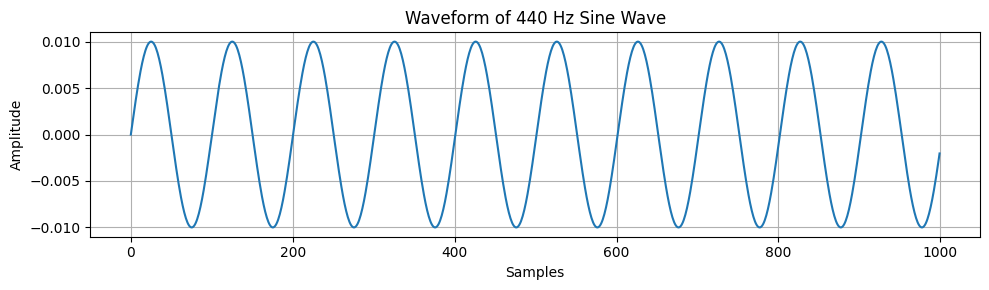

In [4]:
import matplotlib.pyplot as plt

# 只显示前 1000 个采样点
plt.figure(figsize=(10, 3))
plt.plot(signal[:1000])
plt.title(f"Waveform of {frequency} Hz Sine Wave")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import sounddevice as sd

# 参数
duration = 2.0        # 秒
sample_rate = 44100   # 采样率 Hz
amplitude = 0.01      # 振幅（0~1）

# 两个频率
freq1 = 440  # Hz
freq2 = 550  # Hz

# 时间向量
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# 合成两个正弦波叠加
signal = amplitude * (np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t))

# 播放声音
sd.play(signal, samplerate=sample_rate)
sd.wait()

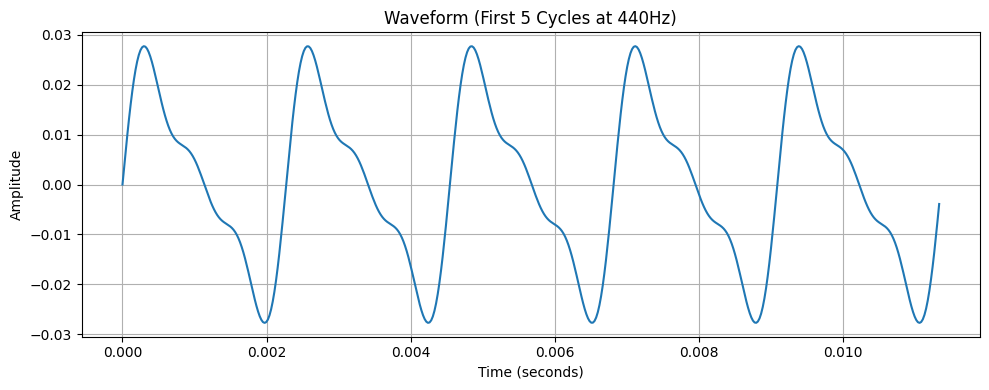

In [14]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# 参数
duration = 2.0
sample_rate = 44100
base_freq = 440
amplitude = 0.02

t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# 固定振幅 + 谐波（无包络）
signal = (
    1.0 * np.sin(2 * np.pi * base_freq * t) +
    0.5 * np.sin(2 * np.pi * 2 * base_freq * t) +
    0.25 * np.sin(2 * np.pi * 3 * base_freq * t)
)
signal *= amplitude  # 固定振幅缩放

# 播放
sd.play(signal, samplerate=sample_rate)
sd.wait()


import matplotlib.pyplot as plt

# 每个周期的持续时间
T = 1 / base_freq
time_to_plot = 5 * T
samples_to_plot = int(sample_rate * time_to_plot)

# 画图
plt.figure(figsize=(10, 4))
plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
plt.title("Waveform (First 5 Cycles at 440Hz)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

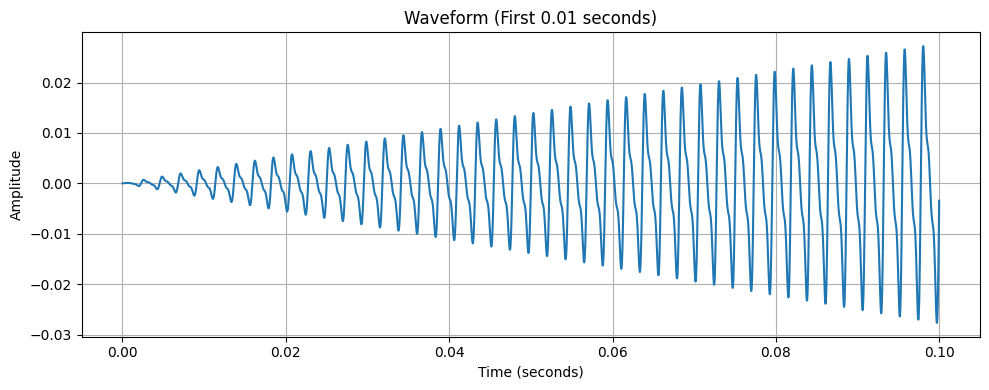

In [11]:
import matplotlib.pyplot as plt

# 画前0.01秒的波形
time_to_plot = 0.1
samples_to_plot = int(sample_rate * time_to_plot)

plt.figure(figsize=(10, 4))
plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
plt.title("Waveform (First 0.01 seconds)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

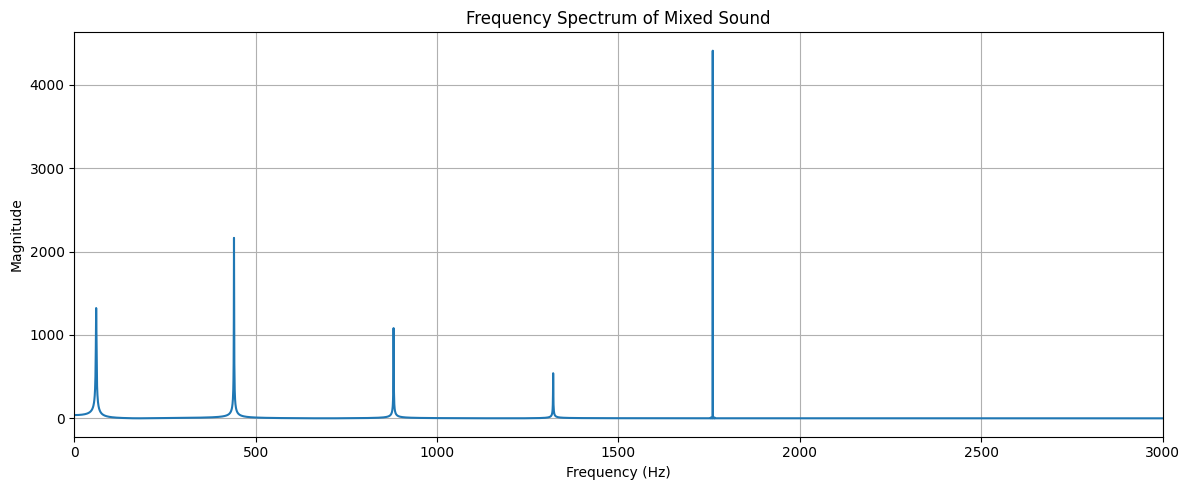

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# 基本参数
duration = 2.0
sample_rate = 44100
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# -------------------------
# 合成三个“乐器”的声音
# -------------------------

# 1. 鼓：短促的低频 + 指数衰减
drum = 0.3 * np.sin(2 * np.pi * 60 * t) * np.exp(-5 * t)

# 2. 钢琴：基频 + 谐波 + 包络
piano = (
    0.2 * np.sin(2 * np.pi * 440 * t) + 
    0.1 * np.sin(2 * np.pi * 880 * t) + 
    0.05 * np.sin(2 * np.pi * 1320 * t)
) * np.exp(-2 * t)

# 3. 小提琴：持续高频 + 轻微颤动
violin = 0.1 * np.sin(2 * np.pi * 1760 * t + 0.005 * np.sin(2 * np.pi * 5 * t))

# 混音：叠加它们
signal = drum + piano + violin

# 播放声音
sd.play(signal, samplerate=sample_rate)
sd.wait()

# -------------------------
# 绘制频谱图（傅里叶变换）
# -------------------------
from scipy.fft import fft, fftfreq

N = len(signal)
yf = np.abs(fft(signal))[:N//2]
xf = fftfreq(N, 1/sample_rate)[:N//2]

plt.figure(figsize=(12, 5))
plt.plot(xf, yf)
plt.title("Frequency Spectrum of Mixed Sound")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 3000)  # 只看 0~3kHz 范围
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 840.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# 基本参数
sample_rate = 44100
note_duration = 0.4  # 每个音符持续0.4秒
t_note = np.linspace(0, note_duration, int(sample_rate * note_duration), endpoint=False)

# 小提琴合成器函数
def violin_note(frequency):
    base = np.sin(2 * np.pi * frequency * t_note)
    harmonic = 0.3 * np.sin(2 * np.pi * 2 * frequency * t_note)
    vibrato = 0.005 * np.sin(2 * np.pi * 5 * t_note)  # 小颤动
    signal = (base + harmonic) * np.exp(-0.5 * t_note)  # 模拟音色和包络
    return signal

# 旋律音符（前两句）
frequencies = [
    261.63, 261.63, 392.00, 392.00, 440.00, 440.00, 392.00,  # 1 1 5 5 6 6 5
    349.23, 349.23, 329.63, 329.63, 293.66, 293.66, 261.63   # 4 4 3 3 2 2 1
]

# 合成整段旋律
song = np.concatenate([violin_note(f) for f in frequencies])

# 播放
sd.play(song, samplerate=sample_rate)
sd.wait()

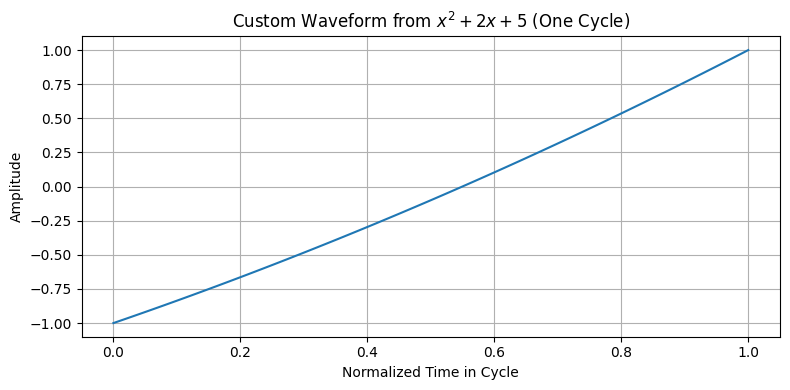

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# 参数
sample_rate = 44100
duration = 2.0  # 秒
frequency = 440  # Hz，目标音高

# 原始函数波形：x in [3, 5]
x_raw = np.linspace(3, 5, 200)
y_raw = x_raw**2 + 2 * x_raw + 5

# 归一化到 [-1, 1]
y_waveform = 2 * (y_raw - np.min(y_raw)) / (np.max(y_raw) - np.min(y_raw)) - 1

# 目标：每个周期采样点数
samples_per_period = int(sample_rate / frequency)

# 重采样波形到一个周期
from scipy.interpolate import interp1d
interp_fn = interp1d(np.linspace(0, 1, len(y_waveform)), y_waveform)
single_period = interp_fn(np.linspace(0, 1, samples_per_period))

# 生成完整信号：重复周期直到达成目标长度
num_periods = int(sample_rate * duration / samples_per_period)
signal = np.tile(single_period, num_periods)

# 播放声音
sd.play(signal, samplerate=sample_rate)
sd.wait()

# 画出一个周期的波形
plt.figure(figsize=(8, 4))
plt.plot(np.linspace(0, 1, len(single_period)), single_period)
plt.title("Custom Waveform from $x^2 + 2x + 5$ (One Cycle)")
plt.xlabel("Normalized Time in Cycle")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

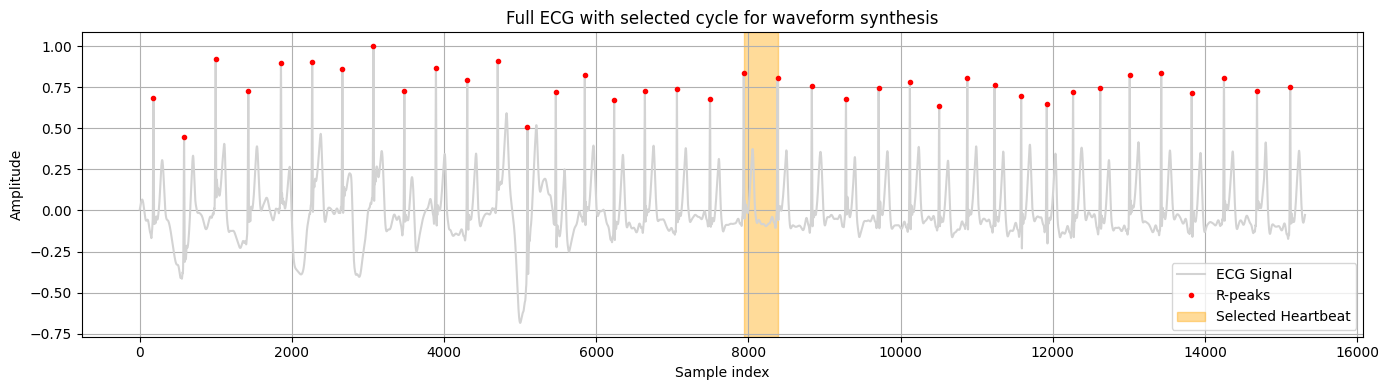

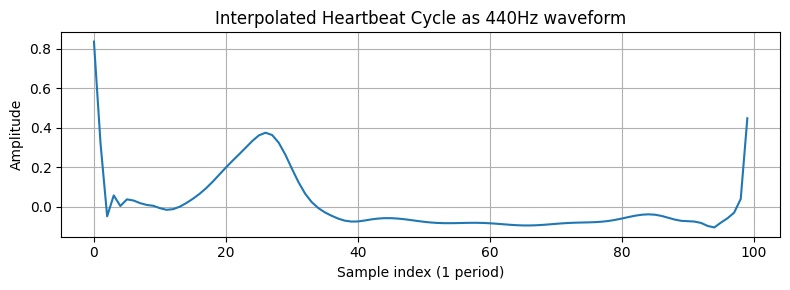

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.io.wavfile import write
from IPython.display import Audio
from pathlib import Path

# === 1. 读取并标准化 ECG 数据 ===
csv_path = Path("ecg_export.csv")  # 替换为你的路径
ecg = pd.read_csv(csv_path, header=None).values.flatten()
ecg = ecg - np.mean(ecg)
ecg = ecg / np.max(np.abs(ecg))

# === 2. 自动检测 R 峰 ===
fs = 512  # ECG 原始采样率（Hz）
min_distance = int(0.6 * fs)
peaks, _ = find_peaks(ecg, distance=min_distance, prominence=0.3)

# === 3. 使用中间一对 R-R 峰作为心跳周期 ===
mid_idx = len(peaks) // 2
r1, r2 = peaks[mid_idx], peaks[mid_idx + 1]
ecg_1cycle = ecg[r1:r2]

# === 4. 可视化全 ECG 并高亮选定周期 ===
plt.figure(figsize=(14, 4))
plt.plot(ecg, label="ECG Signal", color="lightgray")
plt.plot(peaks, ecg[peaks], "r.", label="R-peaks")
plt.axvspan(r1, r2, color="orange", alpha=0.4, label="Selected Heartbeat")
plt.title("Full ECG with selected cycle for waveform synthesis")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 5. 插值为 440Hz 的周期波形 ===
target_freq = 440
sample_rate = 44100
samples_per_period = int(sample_rate / target_freq)
interp_waveform = np.interp(
    np.linspace(0, len(ecg_1cycle), samples_per_period, endpoint=False),
    np.arange(len(ecg_1cycle)),
    ecg_1cycle
)

# === 6. 重复拼接为 2 秒声音 ===
num_periods = int(sample_rate * 2 / samples_per_period)
signal = np.tile(interp_waveform, num_periods)

# === 7. 保存为 .wav 文件 ===
wav_path = "ecg_heartbeat_midcycle.wav"
wav_int16 = (signal * 32767).astype(np.int16)
write(wav_path, sample_rate, wav_int16)

# === 8. 可视化周期波形 ===
plt.figure(figsize=(8, 3))
plt.plot(interp_waveform)
plt.title("Interpolated Heartbeat Cycle as 440Hz waveform")
plt.xlabel("Sample index (1 period)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. 播放音频（用于 Jupyter）===
Audio(filename=wav_path)

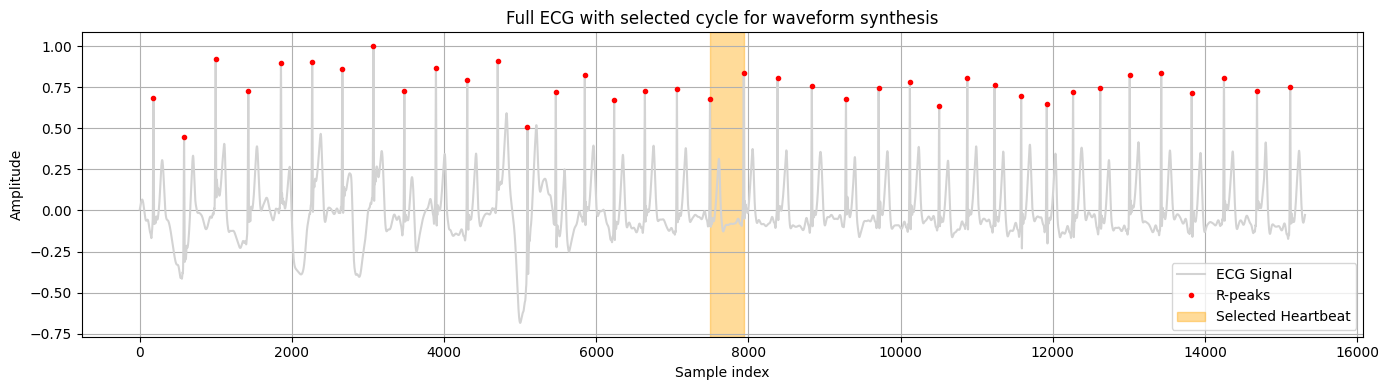

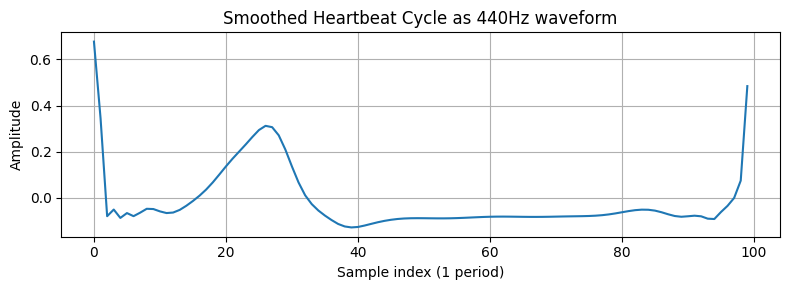

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.io.wavfile import write
from IPython.display import Audio
from pathlib import Path

# === 1. 读取并标准化 ECG 数据 ===
csv_path = Path("ecg_export.csv")  # 替换为你的路径
ecg = pd.read_csv(csv_path, header=None).values.flatten()
ecg = ecg - np.mean(ecg)
ecg = ecg / np.max(np.abs(ecg))

# === 2. 自动检测 R 峰 ===
fs = 512  # ECG 原始采样率（Hz）
min_distance = int(0.6 * fs)
peaks, _ = find_peaks(ecg, distance=min_distance, prominence=0.3)

# === ✅ 3. 选择平滑周期（7495 到 7939）===
r1, r2 = 7495, 7939
ecg_1cycle = ecg[r1:r2]

# === 4. 可视化全 ECG 并高亮选定周期 ===
plt.figure(figsize=(14, 4))
plt.plot(ecg, label="ECG Signal", color="lightgray")
plt.plot(peaks, ecg[peaks], "r.", label="R-peaks")
plt.axvspan(r1, r2, color="orange", alpha=0.4, label="Selected Heartbeat")
plt.title("Full ECG with selected cycle for waveform synthesis")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 5. 插值为 440Hz 的周期波形 ===
target_freq = 440
sample_rate = 44100
samples_per_period = int(sample_rate / target_freq)
interp_waveform = np.interp(
    np.linspace(0, len(ecg_1cycle), samples_per_period, endpoint=False),
    np.arange(len(ecg_1cycle)),
    ecg_1cycle
)

# === 6. 重复拼接为 2 秒声音 ===
num_periods = int(sample_rate * 2 / samples_per_period)
signal = np.tile(interp_waveform, num_periods)

# === 7. 保存为 .wav 文件 ===
wav_path = "ecg_heartbeat_smooth.wav"
wav_int16 = (signal * 32767).astype(np.int16)
write(wav_path, sample_rate, wav_int16)

# === 8. 可视化周期波形 ===
plt.figure(figsize=(8, 3))
plt.plot(interp_waveform)
plt.title("Smoothed Heartbeat Cycle as 440Hz waveform")
plt.xlabel("Sample index (1 period)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. 播放音频（用于 Jupyter）===
Audio(filename=wav_path)

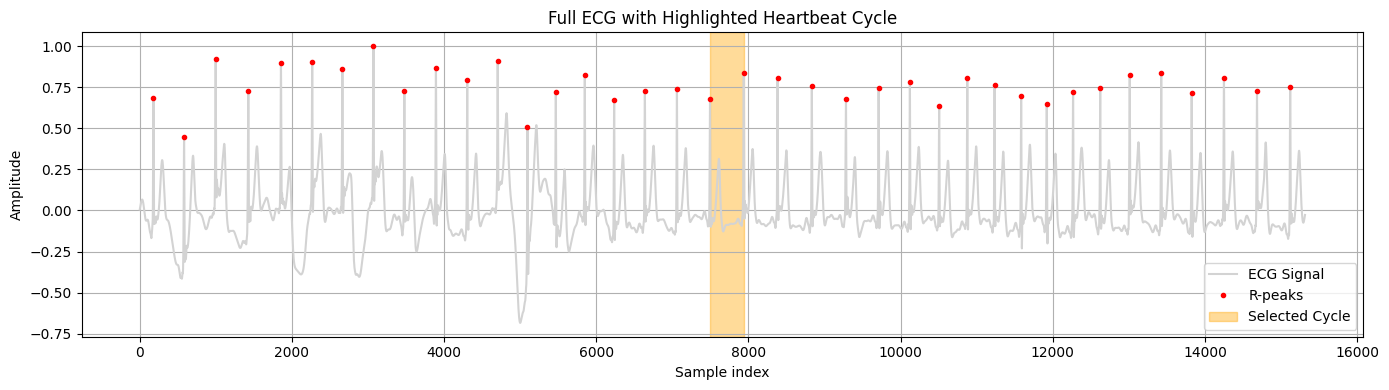

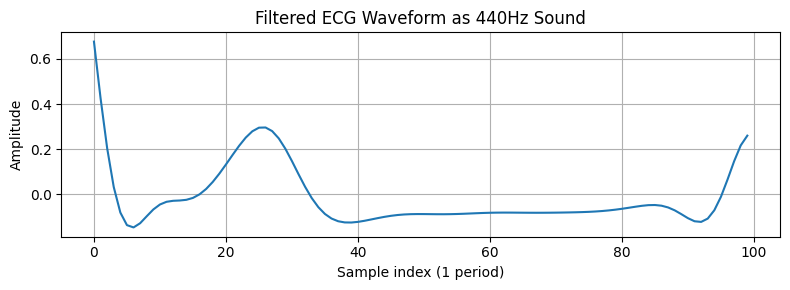

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
from scipy.io.wavfile import write
from IPython.display import Audio
from pathlib import Path

# === 1. 读取并标准化 ECG 数据 ===
csv_path = Path("ecg_export.csv")  # 替换为你的路径
ecg = pd.read_csv(csv_path, header=None).values.flatten()
ecg = ecg - np.mean(ecg)
ecg = ecg / np.max(np.abs(ecg))

# === 2. 自动检测 R 波峰 ===
fs = 512  # 原始 ECG 采样率
min_distance = int(0.6 * fs)
peaks, _ = find_peaks(ecg, distance=min_distance, prominence=0.3)

# === 3. 选一个较平滑的周期（7495 到 7939）===
r1, r2 = 7495, 7939
ecg_1cycle = ecg[r1:r2]

# === 4. 可视化完整 ECG 并标出选中周期 ===
plt.figure(figsize=(14, 4))
plt.plot(ecg, label="ECG Signal", color="lightgray")
plt.plot(peaks, ecg[peaks], "r.", label="R-peaks")
plt.axvspan(r1, r2, color="orange", alpha=0.4, label="Selected Cycle")
plt.title("Full ECG with Highlighted Heartbeat Cycle")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 5. 合成为 440Hz 音色周期 ===
target_freq = 440
sample_rate = 44100
samples_per_period = int(sample_rate / target_freq)

interp_waveform = np.interp(
    np.linspace(0, len(ecg_1cycle), samples_per_period, endpoint=False),
    np.arange(len(ecg_1cycle)),
    ecg_1cycle
)

# === 6. 重复生成 2 秒信号 ===
num_periods = int(sample_rate * 2 / samples_per_period)
signal = np.tile(interp_waveform, num_periods)

# === 7. 低通滤波处理 ===
def lowpass(signal, sr, cutoff=4000, order=4):
    b, a = butter(order, cutoff / (sr / 2), btype='low')
    return filtfilt(b, a, signal)

signal_filtered = lowpass(signal, sample_rate)

# === 8. 保存为 WAV 文件 ===
wav_path = "ecg_heartbeat_smooth_filtered.wav"
wav_int16 = (signal_filtered * 32767).astype(np.int16)
write(wav_path, sample_rate, wav_int16)

# === 9. 可视化一个周期波形 ===
plt.figure(figsize=(8, 3))
plt.plot(signal_filtered[:samples_per_period])
plt.title("Filtered ECG Waveform as 440Hz Sound")
plt.xlabel("Sample index (1 period)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 10. 播放音频（Jupyter 专用）===
Audio(filename=wav_path)

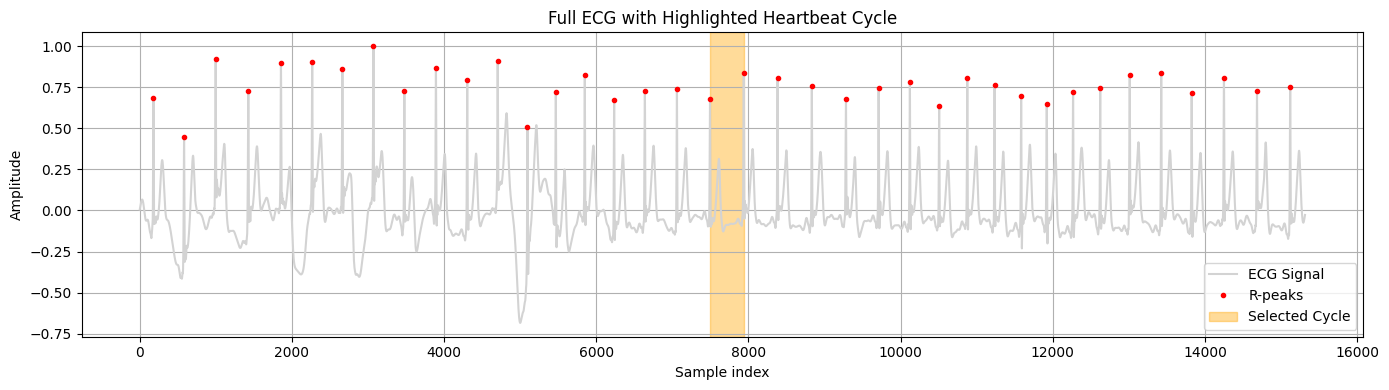

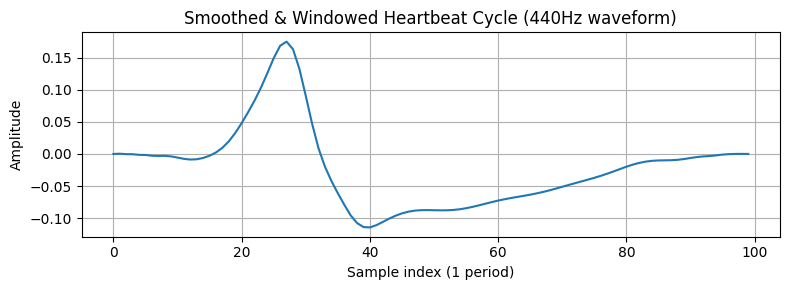

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.io.wavfile import write
from IPython.display import Audio
from pathlib import Path

# === 1. 读取并标准化 ECG 数据 ===
csv_path = Path("ecg_export.csv")  # 替换为你的路径
ecg = pd.read_csv(csv_path, header=None).values.flatten()
ecg = ecg - np.mean(ecg)
ecg = ecg / np.max(np.abs(ecg))

# === 2. 自动检测 R 峰 ===
fs = 512  # ECG 原始采样率（Hz）
min_distance = int(0.6 * fs)
peaks, _ = find_peaks(ecg, distance=min_distance, prominence=0.3)

# === 3. 选择平滑周期（7495 到 7939）===
r1, r2 = 7495, 7939
ecg_1cycle = ecg[r1:r2]

# === 4. 可视化完整 ECG 并标注所选周期 ===
plt.figure(figsize=(14, 4))
plt.plot(ecg, label="ECG Signal", color="lightgray")
plt.plot(peaks, ecg[peaks], "r.", label="R-peaks")
plt.axvspan(r1, r2, color="orange", alpha=0.4, label="Selected Cycle")
plt.title("Full ECG with Highlighted Heartbeat Cycle")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 5. 插值周期波形，并乘以 Hanning 窗加窗处理 ===
target_freq = 440
sample_rate = 44100
samples_per_period = int(sample_rate / target_freq)

interp_waveform = np.interp(
    np.linspace(0, len(ecg_1cycle), samples_per_period, endpoint=False),
    np.arange(len(ecg_1cycle)),
    ecg_1cycle
)

# 加窗：使首尾平滑过渡
window = np.hanning(len(interp_waveform))
interp_windowed = interp_waveform * window

# === 6. 重复拼接生成 2 秒音频 ===
num_periods = int(sample_rate * 2 / samples_per_period)
signal = np.tile(interp_windowed, num_periods)

# === 7. 保存为 .wav 文件 ===
wav_path = "ecg_heartbeat_smooth_windowed.wav"
wav_int16 = (signal * 32767).astype(np.int16)
write(wav_path, sample_rate, wav_int16)

# === 8. 可视化一个周期波形（加窗后） ===
plt.figure(figsize=(8, 3))
plt.plot(interp_windowed)
plt.title("Smoothed & Windowed Heartbeat Cycle (440Hz waveform)")
plt.xlabel("Sample index (1 period)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. 播放音频（用于 Jupyter）===
Audio(filename=wav_path)

In [9]:
from scipy.signal import resample

# 上采样到 44100Hz（更容易播放）
target_fs = 44100
num_samples = int(len(ecg_audio) * target_fs / fs_ecg)
ecg_audio_upsampled = resample(ecg_audio, num_samples)

# 保存 & 播放
write("ecg_raw_upsampled.wav", target_fs, (ecg_audio_upsampled * 32767).astype(np.int16))
Audio("ecg_raw_upsampled.wav")

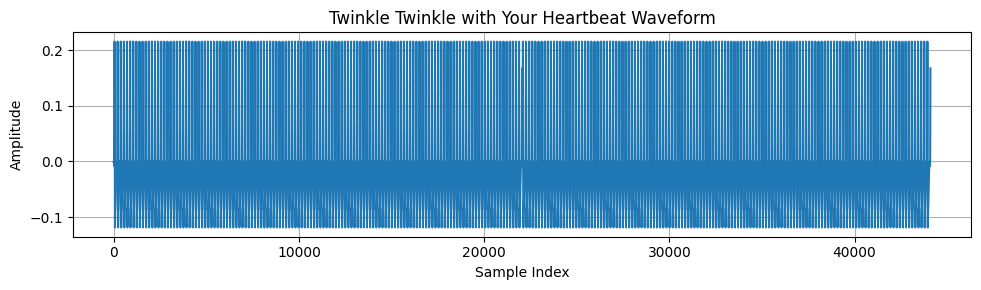

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.io.wavfile import write
from IPython.display import Audio
from pathlib import Path
from scipy.signal import resample

# === 1. 读取并标准化 ECG 数据 ===
csv_path = Path("ecg_export.csv")
ecg = pd.read_csv(csv_path, header=None).values.flatten()
ecg = ecg - np.mean(ecg)
ecg = ecg / np.max(np.abs(ecg))

# === 2. 自动检测 R 峰 ===
fs = 512
min_distance = int(0.6 * fs)
peaks, _ = find_peaks(ecg, distance=min_distance, prominence=0.3)

# === 3. 选一段平滑的心跳周期（如前分析：7495–7939）===
ecg_cycle = ecg[7495:7939]
ecg_cycle = ecg_cycle - np.mean(ecg_cycle)
ecg_cycle = ecg_cycle / np.max(np.abs(ecg_cycle))

# === 4. 小星星旋律音符 & 频率 ===
notes = ['C', 'C', 'G', 'G', 'A', 'A', 'G',
         'F', 'F', 'E', 'E', 'D', 'D', 'C']
note_freqs = {
    'C': 261.63,
    'D': 293.66,
    'E': 329.63,
    'F': 349.23,
    'G': 392.00,
    'A': 440.00,
    'B': 493.88,
}

# === 5. 合成每个音符段 ===
sample_rate = 44100
note_duration = 0.5  # 每个音符 0.5 秒
samples_per_note = int(sample_rate * note_duration)

melody = []
for note in notes:
    freq = note_freqs[note]
    samples_per_period = int(sample_rate / freq)

    # 插值为目标音高的周期波形
    period_waveform = np.interp(
        np.linspace(0, len(ecg_cycle), samples_per_period, endpoint=False),
        np.arange(len(ecg_cycle)),
        ecg_cycle
    )

    # 加窗处理（首尾平滑）
    window = np.hanning(len(period_waveform))
    period_waveform *= window

    # 重复拼接为完整音符长度
    num_repeats = samples_per_note // samples_per_period + 1
    note_wave = np.tile(period_waveform, num_repeats)[:samples_per_note]
    melody.append(note_wave)

# === 6. 拼接所有音符 ===
melody_waveform = np.concatenate(melody)

# === 7. 保存为 .wav 文件 ===
wav_path = "twinkle_heart.wav"
wav_int16 = (melody_waveform * 32767).astype(np.int16)
write(wav_path, sample_rate, wav_int16)

# === 8. 可视化（前 1 秒）===
plt.figure(figsize=(10, 3))
plt.plot(melody_waveform[:sample_rate])
plt.title("Twinkle Twinkle with Your Heartbeat Waveform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. 播放 ===
Audio(filename=wav_path)

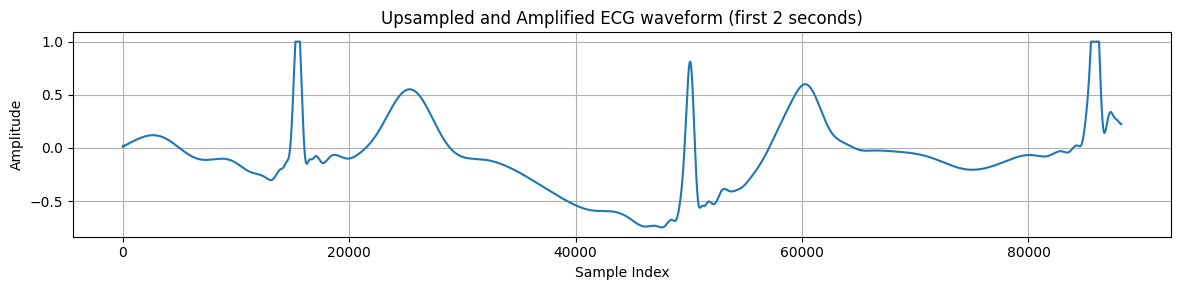

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import resample
from scipy.io.wavfile import write
from IPython.display import Audio

# === 1. 读取并标准化 ECG ===
csv_path = Path("ecg_export.csv")  # 替换为你的路径
ecg = pd.read_csv(csv_path, header=None).values.flatten()
ecg_audio = ecg - np.mean(ecg)
ecg_audio = ecg_audio / np.max(np.abs(ecg_audio))

# === 2. 上采样到 44100 Hz ===
fs_ecg = 512
target_fs = 44100
num_samples = int(len(ecg_audio) * target_fs / fs_ecg)
ecg_audio_upsampled = resample(ecg_audio, num_samples)

# === 3. 放大音量（乘以一个增益系数）===
gain = 1.8  # 你可以调得更大，但不要超过 2 避免削波
ecg_amplified = ecg_audio_upsampled * gain
ecg_amplified = np.clip(ecg_amplified, -1.0, 1.0)  # 避免超过 [-1, 1] 削波

# === 4. 保存为 WAV 文件 ===
wav_path = "ecg_raw_upsampled_louder.wav"
write(wav_path, target_fs, (ecg_amplified * 32767).astype(np.int16))

# === 5. 可视化前 2 秒波形 ===
duration_to_plot = 2  # 秒
samples_to_plot = int(target_fs * duration_to_plot)

plt.figure(figsize=(12, 3))
plt.plot(ecg_amplified[:samples_to_plot])
plt.title("Upsampled and Amplified ECG waveform (first 2 seconds)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. 播放音频 ===
Audio(wav_path)